# Credit Risk Evaluator

In [1]:
# Dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Retrieve the Data

The data is located in the Resources Folder:

* `myopia.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data and display dataframe
df =  pd.read_csv("Resources/myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


## Prepare the Data

In [3]:
# Drop the MYOPIC column from the DataFrame
myopia_df = df.drop("MYOPIC", axis=1)

# Standardize the Data
myopia_scaled = StandardScaler().fit_transform(myopia_df)
print(myopia_scaled[0:5])

# Use PCA to compress data
pca = PCA(n_components=0.99)

# Get principal components 
myopia_pca = pca.fit_transform(myopia_scaled)

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [4]:
# Create dataframe from PCA data
myopia_pca_df = pd.DataFrame(data=myopia_pca, columns=["principal 1", "principal 2", "principal 3", "principal 4", "principal 5", "principal 6", "principal 7", "principal 8", "principal 9", "principal 10", "principal 11", "principal 12"])
myopia_pca_df.head()

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10,principal 11,principal 12
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370


In [5]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

In [6]:
# Reduce the dataset dimensions
tsne = TSNE(n_components=3,learning_rate=100)
tsne_features = tsne.fit_transform(myopia_pca_df)
tsne_features.shape

(618, 3)

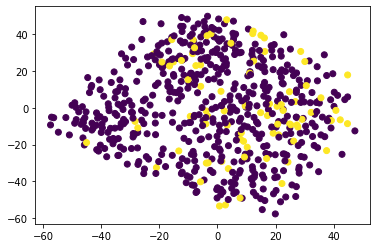

In [7]:
# Visualize the results
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df["MYOPIC"])
plt.show()

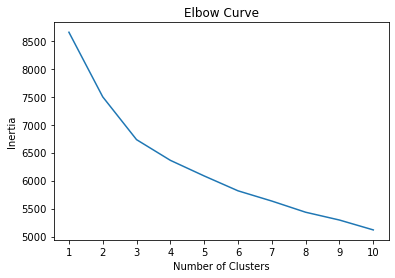

In [8]:
# Create empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Calculate the inertia for each value
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbowcurve_data = {"k": k, "inertia": inertia}
df_elbowcurve = pd.DataFrame(elbowcurve_data)
df_elbowcurve.head()

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbowcurve['k'], df_elbowcurve['inertia'])
plt.xticks(range(1,11))
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Curve')
plt.show()

In [9]:
# Predict clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(myopia_pca)

# Predict clusters
prediction = model.predict(myopia_pca)

# Add the predicted class column to the myopia_pca_df dataframe
myopia_pca_df["class"] = model.labels_
myopia_pca_df.head()

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10,principal 11,principal 12,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,0


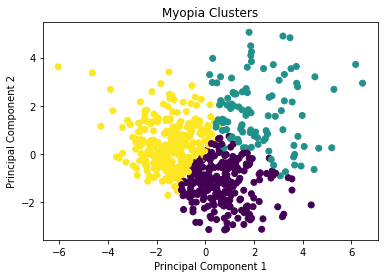

In [10]:
# Visualize the clusters
plt.scatter(x=myopia_pca_df['principal 1'], y=myopia_pca_df['principal 2'], c=myopia_pca_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Myopia Clusters')
plt.show()

## Reccomendation

Upon the completion of the analysis, neither of the models were able 
to provide distinct clusters to predict outcomes in the data. The t_SNE and K-means 
model visualizations did not display any clear clusters but the K-means model did show
three potential clusters that could potentially be formed if the data was transformed
in a different manner. Based on the Elbow Curve diagram it is predicted that the patients 
can be clustered into three groups. Further analysis could be done with more data points 
under the K-means model and may show three distinct clusters.